In [1]:
import numpy as np
import pandas as pd
import googletrans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("amazon.csv", thousands = ".")

In [4]:
data.shape

(6454, 5)

In [5]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,01-01-1998
1,1999,Acre,Janeiro,0,01-01-1999
2,2000,Acre,Janeiro,0,01-01-2000
3,2001,Acre,Janeiro,0,01-01-2001
4,2002,Acre,Janeiro,0,01-01-2002


In [6]:
data.describe(include = 'all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,01-01-2004
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [8]:
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [9]:
data = data.replace(0, np.nan)
data2 = data.dropna(subset=['number'])

In [24]:
data2.describe(include = 'all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,01-01-2016
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [22]:
forest_fire_per_month = data2.groupby('month')['number'].sum()

In [29]:
forest_fire_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [32]:
months.unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique,axis=0)

NameError: name 'months' is not defined

In [34]:
data.month

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6454, dtype: object

In [39]:
months_unique = list(data.month.unique())
forest_fire_per_month = forest_fire_per_month.reindex(months_unique, axis=0)

In [40]:
forest_fire_per_month = forest_fire_per_month.to_frame()

In [41]:
forest_fire_per_month.head()

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0


In [43]:
forest_fire_per_month.reset_index(level=0, inplace= True)

In [44]:
forest_fire_per_month.head()

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0


In [77]:
from googletrans import Translator

In [78]:
translator = Translator()
for month in months_unique: 
    detected = translator.detect(month)     
    translated = translator.translate(month)     
    print(detected)     
    print(translated)     
    print("...")

Detected(lang=en, confidence=0.6906946)
Translated(src=en, dest=en, text=Janeiro, pronunciation=Janeiro, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=February, pronunciation=February, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=March, pronunciation=March, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.47058824)
Translated(src=es, dest=en, text=April, pronunciation=April, extra_data="{'translat...")
...
Detected(lang=pt, confidence=0.75)
Translated(src=pt, dest=en, text=May, pronunciation=May, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=June, pronunciation=June, extra_data="{'translat...")
...
Detected(lang=pt, confidence=1.0)
Translated(src=pt, dest=en, text=July, pronunciation=July, extra_data="{'translat...")
...
Detected(lang=es, confidence=0.37796605)
Translated(src=es, dest=en, text=August, pronunciation

In [79]:
import sys
sys.path.insert(1, './lib/python3.7/site-packages')

In [81]:
translator2 = Translator() 
for i, m in enumerate(forest_fire_per_month['month']):
    translated = translator2.translate(m)  
    month1 = translated.text    
    forest_fire_per_month.at[i, 'month'] = month1

In [83]:
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,February,30952.0
2,March,35118.0
3,April,28364.0
4,May,46083.0
5,June,111405.0
6,July,217620.0
7,August,740841.0
8,September,1015925.0
9,October,629665.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

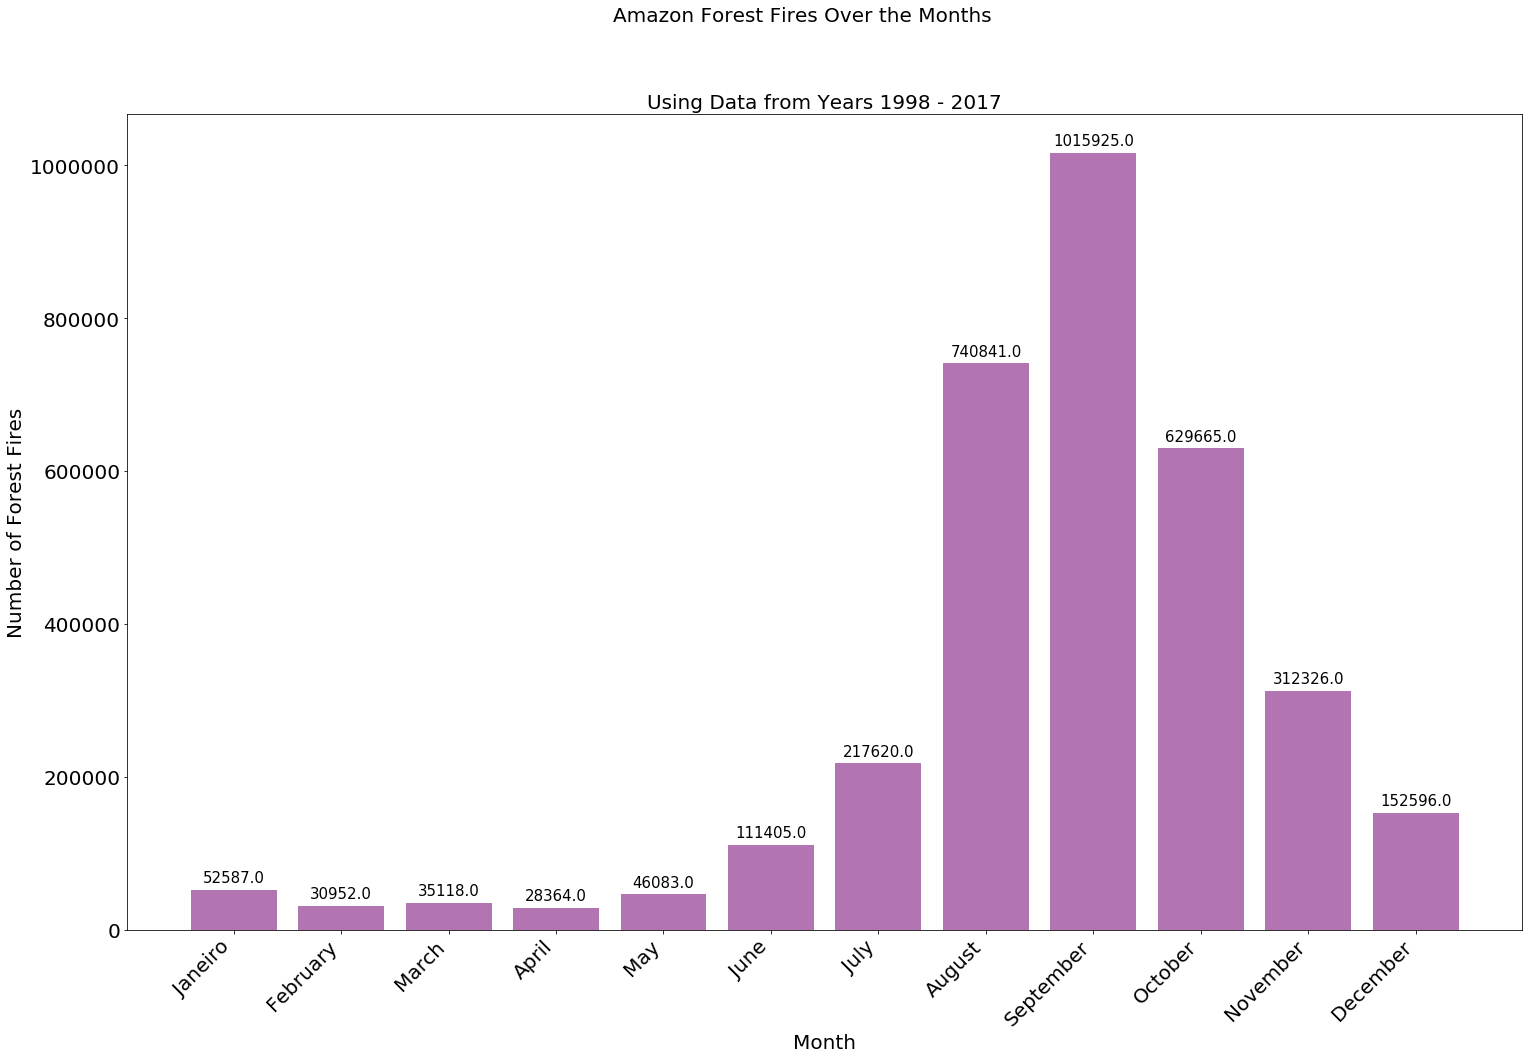

In [88]:
plt.figure(figsize=(25, 15)) #specify width and height 

#plt.bar(x-values, y-values) 
plt.bar(
forest_fire_per_month['month'],
forest_fire_per_month['number'], 
color = (0.5,0.1,0.5,0.6)) 

#use .suptitle for the actual title and .title for the subheading
plt.suptitle('Amazon Forest Fires Over the Months', fontsize=20) 
plt.title('Using Data from Years 1998 - 2017', fontsize=20)  
plt.xlabel('Month', fontsize=20) 
plt.ylabel('Number of Forest Fires', fontsize=20)

#plt.text(x-coordinate, y-coordinate, valueOfText, alignmnet)
#this adds text at the top of each bar indicating its value
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,
        num + 10000,
        num,
        ha='center',
        fontsize=15) 
    
#plt.setp is to set a property on an artist object.
#plt.gca() gets the current axes (gca) instance on the current figure #matching the given keyword args.
#xticklabels and yticklabels are nothing but the values of the #lables on the x and y axis.

#The code below lets us set the fontsize and alignment of the x and #y axis tick labels

plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20)

plt.setp(plt.gca().get_yticklabels(), fontsize=20)